## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter 004 Example 002B-F06

In [1]:
sfeature=['F06']

## Part A - Load Libraries

In [2]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, average_precision_score, precision_recall_curve
from sklearn.utils.fixes import signature
from math import sqrt

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

## Part B - Load the diabetes dataset

In [3]:
fileName = '../../Data/Sickness05.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Data\Sickness05.csv


In [4]:
sickdf= pd.read_csv(fileFullName, header=0)
print(sickdf.shape)
print(sickdf.columns)

(442, 16)
Index(['F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10',
       'F11', 'F12', 'T01', 'T02', 'T03', 'T'],
      dtype='object')


## Part C - Use only one feature

In [5]:
sickness_X = sickdf[sfeature].copy(deep=True)
sickness_X.columns = (['F'])

In [6]:
print(sickness_X.describe())

                  F
count  4.420000e+02
mean  -6.334842e-11
std    4.761905e-02
min   -1.156131e-01
25%   -3.035840e-02
50%   -3.819065e-03
75%    2.984439e-02
max    1.987880e-01


In [7]:
print(sickness_X.shape)

(442, 1)


## Part D - Extract train feature set

In [8]:
sickness_X_train = pd.DataFrame(sickness_X[:-100])

In [9]:
print(sickness_X_train.shape)

(342, 1)


## Part E - Extract the Test feature set

In [10]:
sickness_X_test = pd.DataFrame(sickness_X[-100:])

In [11]:
print(sickness_X_test.shape)

(100, 1)


## Part C - Split the targets into training/testing sets 

In [12]:
sickness_y = sickdf[['T02']].copy(deep=True)
sickness_y.columns = (['T'])

In [13]:
sickness_y_train = pd.DataFrame(sickness_y[:-100])

In [14]:
sickness_y_test = pd.DataFrame(sickness_y[-100:])

In [15]:
for i in range(5):
    print('Test Feature: % 8.4f results in target: % 1d' % (sickness_X_train['F'].iloc[i], sickness_y_train['T'].iloc[i]))

Test Feature:  -0.0348 results in target:  1
Test Feature:  -0.0192 results in target:  0
Test Feature:  -0.0342 results in target:  1
Test Feature:   0.0250 results in target:  0
Test Feature:   0.0156 results in target:  1


In [16]:
for i in range(5):
    print('Test Feature: % 8.4f results in target: % 1d' % (sickness_X_test['F'].iloc[i], sickness_y_test['T'].iloc[i]))

Test Feature:   0.0181 results in target:  1
Test Feature:   0.0087 results in target:  0
Test Feature:   0.0644 results in target:  0
Test Feature:   0.0579 results in target:  1
Test Feature:   0.1274 results in target:  1


## Part D - Create linear regression object

In [17]:
regr = linear_model.LinearRegression(n_jobs=4, normalize=True)

In [18]:
print(regr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=True)


## Part E - Train the model using the training sets

In [19]:
regr.fit(sickness_X_train, sickness_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=True)

## Part F - Make predictions using the testing set

In [20]:
sickness_y_pred = regr.predict(sickness_X_test)

## Part G - The coefficients

In [21]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[1.74806066]]


## Part H - The mean squared error

In [22]:
meanSquaredError=mean_squared_error(sickness_y_test, sickness_y_pred)
print("Mean squared error (MSE): %0.4f"
      % meanSquaredError)

Mean squared error (MSE): 0.2562


In [23]:
rootMeanSquaredError = sqrt(meanSquaredError)
print("Root Mean Square Error (RMSE): %0.4f" % rootMeanSquaredError)

Root Mean Square Error (RMSE): 0.5061


## Part I - Explained variance score: 1 is perfect prediction

In [24]:
print('Variance score: %0.4f' % r2_score(sickness_y_test, sickness_y_pred))

Variance score: -0.0247


In [25]:
average_precision = average_precision_score(sickness_y_test, sickness_y_pred)

print('Average precision-recall score: {0:0.4f}'.format(average_precision))

Average precision-recall score: 0.5366


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.5366')

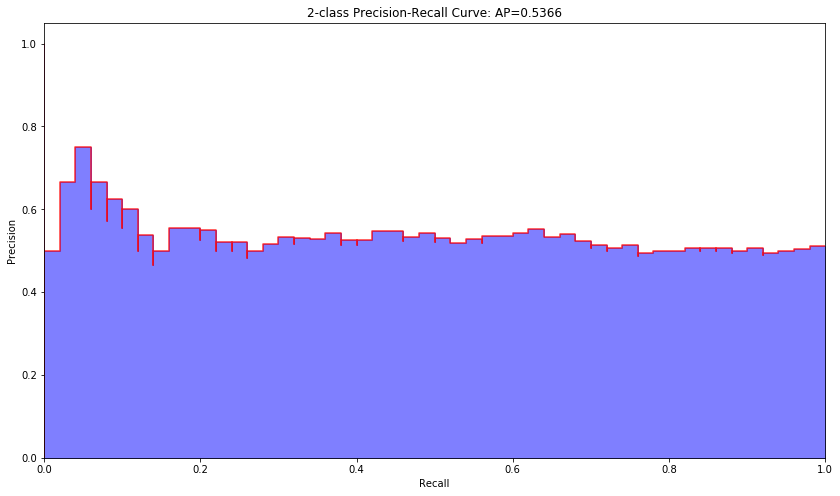

In [26]:
precision, recall, thresholds = precision_recall_curve(sickness_y_test, sickness_y_pred)
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
fig1 = plt.figure(figsize=(14, 8))
plt.title('Water Sickness Precision Recall Curve')
plt.step(recall, precision, color='red', alpha=0.8,
         where='post')
plt.fill_between(recall, precision, alpha=0.5, color='blue', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall Curve: AP={0:0.4f}'.format(
          average_precision))

## Part J - Plot outputs

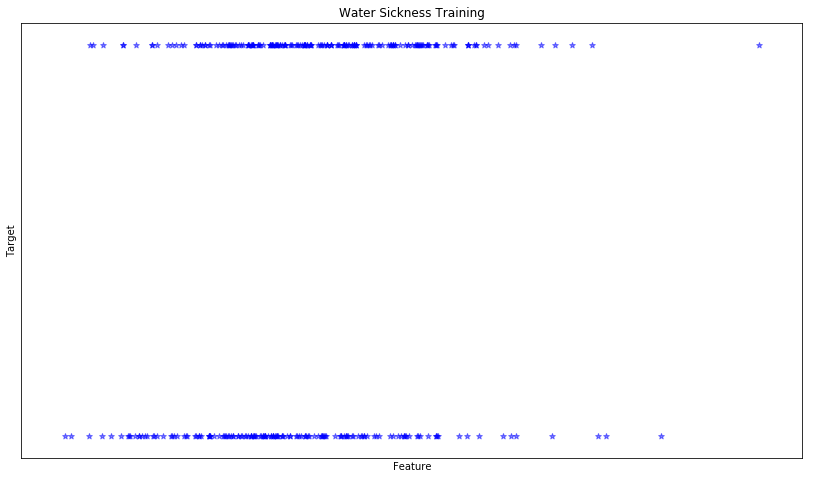

In [27]:
fig2 = plt.figure(figsize=(14, 8))
plt.title('Water Sickness Training')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.scatter(sickness_X_train, sickness_y_train,  color='blue', alpha=0.5, marker='*')
plt.xticks(())
plt.yticks(())

plt.show()

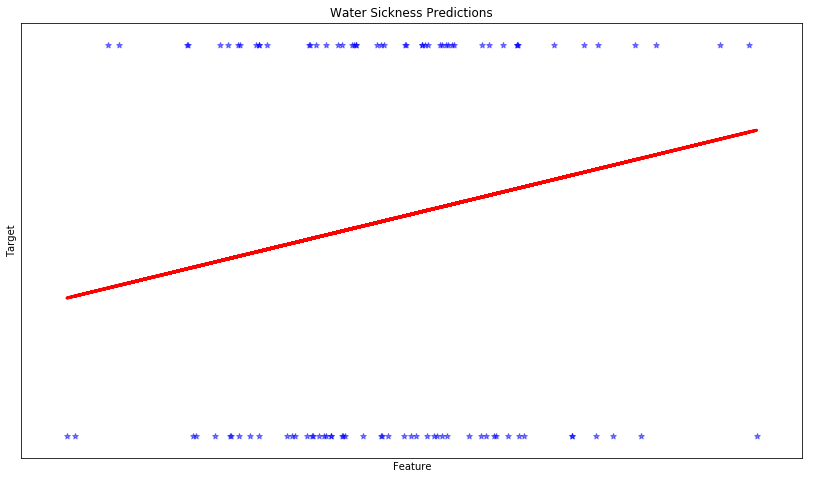

In [28]:
fig3 = plt.figure(figsize=(14, 8))
plt.title('Water Sickness Predictions')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.scatter(sickness_X_test, sickness_y_test,  color='blue', alpha=0.5, marker='*')
plt.plot(sickness_X_test, sickness_y_pred, color='red', linewidth=3)
plt.xticks(())
plt.yticks(())

plt.show()

In [29]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04'])
print(imagepath)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 04


In [30]:
if not os.path.exists(imagepath):
    os.makedirs(imagepath)

In [31]:
figname1 = 'Chapter-004-Example-002B-'+sfeature[0]+'-01.jpg'
print(figname1)
figname2 = 'Chapter-004-Example-002B-'+sfeature[0]+'-02.jpg'
print(figname2)
figname3 = 'Chapter-004-Example-002B-'+sfeature[0]+'-03.jpg'
print(figname3)

Chapter-004-Example-002B-F06-01.jpg
Chapter-004-Example-002B-F06-02.jpg
Chapter-004-Example-002B-F06-03.jpg


In [32]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04',figname1])
fig1.savefig(imagename, bbox_inches='tight')

In [33]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04',figname2])
fig2.savefig(imagename, bbox_inches='tight')

In [34]:
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 04',figname3])
fig3.savefig(imagename, bbox_inches='tight')

In [35]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-07 13:02:09.264541
